# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2384 Кочуров Александр Дмитриевич и Чепасов Дмитрий Витальевич. Вариант №18.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Циклическая (угловая) частота $\omega$ и частота $f$ связаны соотношением:
$\omega = 2 \pi f$

Входной сигнал $s(t)$ может быть представлен в виде суммы гармонических колебаний:
$$ s(t) = \sum_{k=1}^{N} c_k \cdot e^{j 2 \pi f_k t} $$

Выходной сигнал $y(t)$ после фильтрации:
$$ y(t) = \sum_{k=1}^{N} c_k \cdot \tilde{H}(f_k) \cdot e^{j 2 \pi f_k t} $$
где $\tilde{H}(f)$ - передаточная функция фильтра, которая показывает, как фильтр изменяет амплитуду и фазу каждой частотной компоненты.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Задание 1: Сглаживание прямой линией

Нерекурсивный фильтр для сглаживания прямой линией описывается уравнением:
$$ y(t) = A + Bt $$
Для нахождения коэффициентов $A$ и $B$ используется метод наименьших квадратов (МНК), минимизируя сумму квадратов отклонений:
$$ F_{2h+1}(A, B) = \sum_{k=-h}^{h} (s_k - A - Bk)^2 \to \min_{A, B} $$
Возьмем частные производные по $A$ и $B$ и приравняем их к нулю:
$$
\begin{cases}
\frac{\partial F_{2h+1}}{\partial A} = -2 \sum_{k=-h}^{h} (s_k - A - Bk) = 0 \\
\frac{\partial F_{2h+1}}{\partial B} = -2 \sum_{k=-h}^{h} k(s_k - A - Bk) = 0
\end{cases}
$$
Решая эту систему, получаем:
$$
\begin{cases}
A = \frac{1}{2h+1} \sum_{k=-h}^{h} s_k \\
B = \frac{3}{h(h+1)(2h+1)} \sum_{k=-h}^{h} k s_k
\end{cases}
$$
Для центральной точки окна ($t=0$), сглаженное значение $y_0 = A$. Сдвигая окно, получаем формулу для $y_n$:
$$ y_n = \frac{1}{2h+1} \sum_{k=-h}^{h} s_{n+k} $$
Это формула скользящего среднего. Для нахождения передаточной функции, подставим $s_n = e^{j \omega n}$:
$$ y_n = \frac{1}{2h+1} \sum_{k=-h}^{h} e^{j \omega (n+k)} = \frac{e^{j \omega n}}{2h+1} \sum_{k=-h}^{h} e^{j \omega k} = e^{j \omega n} H(\omega) $$
Следовательно, передаточная функция $H(\omega)$:
$$ H(\omega) = \frac{1}{2h+1} \sum_{k=-h}^{h} e^{j \omega k} $$
Используя формулу для суммы геометрической прогрессии, получаем:
$$ H(\omega) = \frac{1}{2h+1} \frac{\sin(\omega(h+1/2))}{\sin(\omega/2)} $$
Подставляя $\omega = 2\pi f$, получаем итоговую формулу:
$$ \tilde{H}(f) = \frac{1}{2h+1} \frac{\sin((2h+1)\pi f)}{\sin(\pi f)} $$

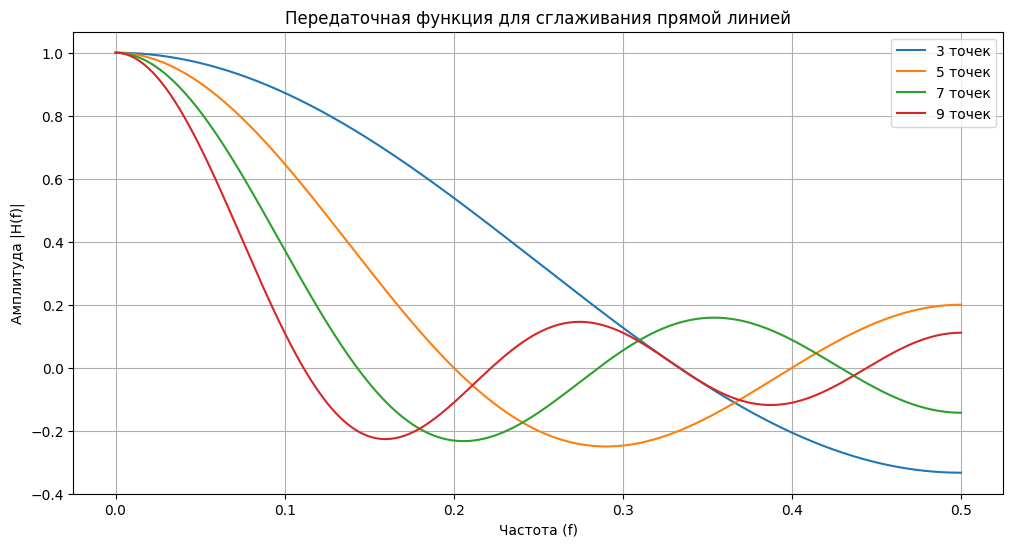

In [ ]:
def H_line(f, h):
    numerator = np.sin(np.pi * f * (2 * h + 1))
    denominator = np.sin(np.pi * f)
    
    result = np.divide(numerator, denominator, out=np.full_like(f, 2*h+1), where=denominator!=0)
    return result / (2 * h + 1)

f = np.linspace(0, 0.5, 500)
points = [3, 5, 7, 9]

plt.figure(figsize=(12, 6))
for p in points:
    h = (p - 1) // 2
    plt.plot(f, H_line(f, h), label=f'{p} точек')

plt.title('Передаточная функция для сглаживания прямой линией')
plt.xlabel('Частота (f)')
plt.ylabel('Амплитуда |H(f)|')
plt.legend()
plt.grid(True)
plt.show()


Графики показывают, что фильтр является низкочастотным, так как амплитуда максимальна при $f=0$ и уменьшается с ростом частоты. С увеличением количества точек (ширины окна) главная полоса пропускания сужается, что делает фильтр более избирательным: он лучше подавляет высокочастотные шумы, но может сгладить и полезные краткосрочные изменения в сигнале.

### Задание 2: Сглаживание полиномом второй степени

Для полинома второй степени $y(t) = A + Bt + Ct^2$, минимизируем функционал:
$$ F_{2h+1}(A, B, C) = \sum_{k=-h}^{h} (s_k - A - Bk - Ck^2)^2 \to \min_{A, B, C} $$
Система уравнений, полученная после дифференцирования:
$$
\begin{cases}
\frac{\partial F}{\partial A} = -2 \sum (s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F}{\partial B} = -2 \sum k(s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F}{\partial C} = -2 \sum k^2(s_k - A - Bk - Ck^2) = 0
\end{cases}
$$
Учитывая, что $\sum k = 0$ и $\sum k^3 = 0$ для симметричного окна, система упрощается. Нас интересует только коэффициент $A$ для $y_0$:
$$ A = \frac{\sum s_k \sum k^4 - \sum k^2 \sum k^2 s_k}{(2h+1)\sum k^4 - (\sum k^2)^2} $$
Сдвигая окно, получаем $y_n$:
$$ y_n = \frac{3}{(2h+1)(4h^2+4h-3)} \left[ (3h^2+3h-1)\sum_{k=-h}^{h} s_{n+k} - 5\sum_{k=-h}^{h} k^2 s_{n+k} \right] $$
Подставляя $s_n = e^{j \omega n}$ и выделяя множитель $e^{j \omega n}$, получаем передаточную функцию:
$$ H(\omega) = \frac{3}{(2h+1)(4h^2+4h-3)} \left[ (3h^2+3h-1)\sum_{k=-h}^{h} e^{j\omega k} - 5\sum_{k=-h}^{h} k^2 e^{j\omega k} \right] $$
После преобразования с использованием $e^{j\omega k} + e^{-j\omega k} = 2\cos(\omega k)$:
$$ H_{2h+1}(\omega) = \frac{3}{(2h+1)(4h^2+4h-3)} \left[ (3h^2+3h-1) \left( 1 + 2 \sum_{k=1}^{h} \cos(\omega k) \right) - 10 \sum_{k=1}^{h} k^2 \cos(\omega k) \right] $$

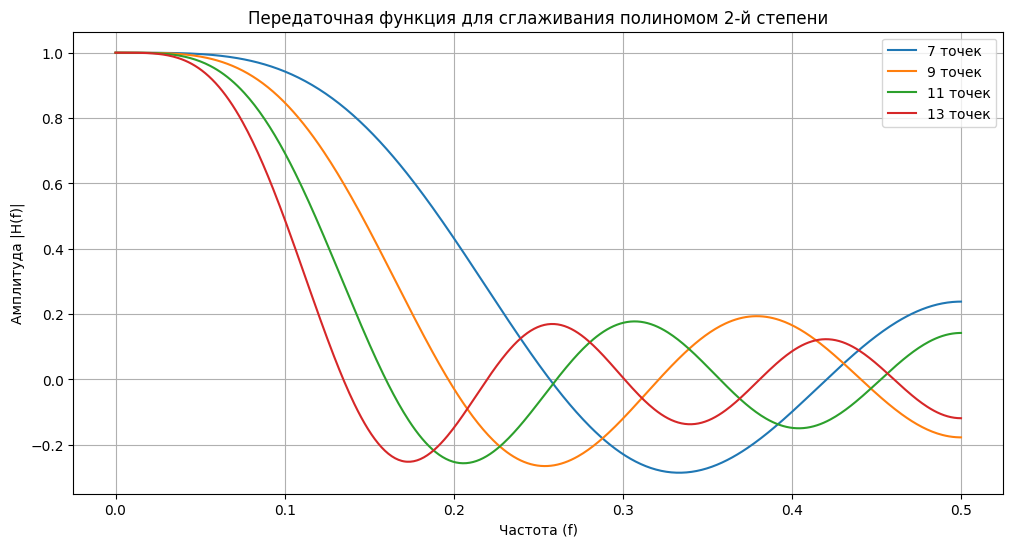

In [15]:
def H_poly2(f, h):
    w = 2 * np.pi * f
    term1_sum = np.sum([np.cos(w * k) for k in range(1, h + 1)], axis=0)
    term2_sum = np.sum([k**2 * np.cos(w * k) for k in range(1, h + 1)], axis=0)
    
    coeff1 = 3 / ((2*h + 1) * (4*h**2 + 4*h - 3))
    term1 = (3*h**2 + 3*h - 1) * (1 + 2 * term1_sum)
    term2 = -10 * term2_sum
    
    return coeff1 * (term1 + term2)

points2 = [7, 9, 11, 13]

plt.figure(figsize=(12, 6))
for p in points2:
    h = (p - 1) // 2
    plt.plot(f, H_poly2(f, h), label=f'{p} точек')

plt.title('Передаточная функция для сглаживания полиномом 2-й степени')
plt.xlabel('Частота (f)')
plt.ylabel('Амплитуда |H(f)|')
plt.legend()
plt.grid(True)
plt.show()


Фильтр на основе полинома второй степени также является низкочастотным. По сравнению с линейным сглаживанием, он имеет более узкую главную полосу пропускания и лучше подавляет боковые лепестки. Это означает, что он более эффективно удаляет высокочастотный шум, сохраняя при этом основные низкочастотные составляющие сигнала. Увеличение числа точек делает фильтр еще более узкополосным.

### Задание 3: Сглаживание полиномом четвёртой степени

Для полинома четвертой степени $y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$, система уравнений для коэффициентов $A, C, E$ (остальные обнуляются из-за симметрии) имеет вид:
$$
\begin{cases}
\sum s_k = A S_0 + C S_2 + E S_4 \\
\sum k^2 s_k = A S_2 + C S_4 + E S_6 \\
\sum k^4 s_k = A S_4 + C S_6 + E S_8
\end{cases}
$$
где $S_m = \sum_{k=-h}^{h} k^m$. Решая эту систему относительно $A$ (например, по правилу Крамера), получаем:
$$ y_0 = A = \frac{R_0(S_4 S_8 - S_6^2) - R_2(S_2 S_8 - S_4 S_6) + R_4(S_2 S_6 - S_4^2)}{S_0(S_4 S_8 - S_6^2) - S_2(S_2 S_8 - S_4 S_6) + S_4(S_2 S_6 - S_4^2)} $$
где $R_m = \sum_{k=-h}^{h} k^m s_k$. Подставляя $s_n = e^{j\omega n}$ и сдвигая окно, получаем передаточную функцию:
$$ H(\omega) = \frac{(S_4 S_8 - S_6^2)\sum e^{j\omega k} - (S_2 S_8 - S_4 S_6)\sum k^2 e^{j\omega k} + (S_2 S_6 - S_4^2)\sum k^4 e^{j\omega k}}{S_0(S_4 S_8 - S_6^2) - S_2(S_2 S_8 - S_4 S_6) + S_4(S_2 S_6 - S_4^2)} $$
После преобразования в косинусы:
$$ H_{2h+1}(\omega) = \frac{(S_4 S_8 - S_6^2) + 2 \sum_{k=1}^{h} \left[ (S_4 S_8 - S_6^2) - (S_2 S_8 - S_4 S_6) k^2 + (S_2 S_6 - S_4^2) k^4 \right] \cos(\omega k)}{S_0 (S_4 S_8 - S_6^2) - S_2 (S_2 S_8 - S_4 S_6) + S_4 (S_2 S_6 - S_4^2)} $$

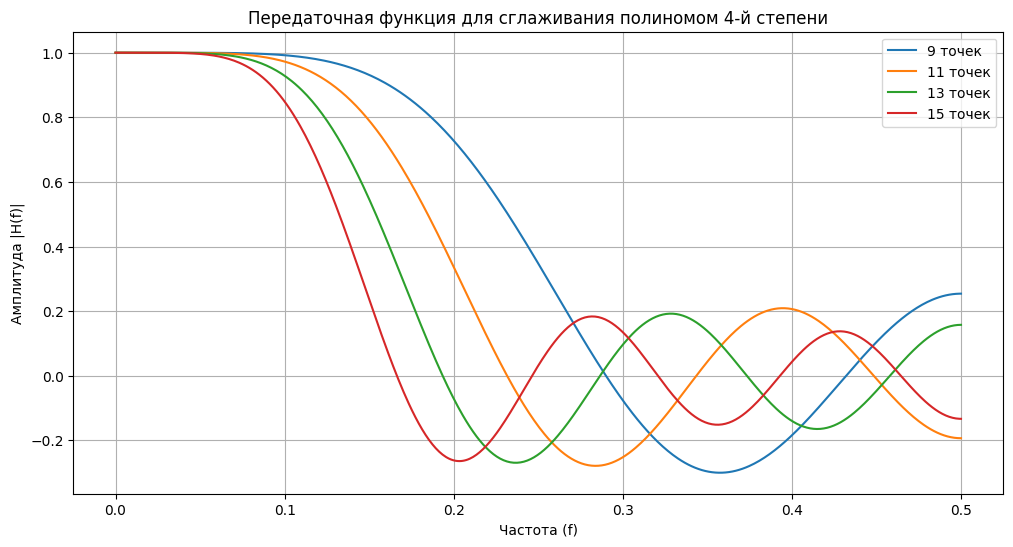

In [16]:
def H_poly4(f, h):
    w = 2 * np.pi * f
    S = lambda m: np.sum([k**m for k in range(-h, h + 1)])
    S0, S2, S4, S6, S8 = S(0), S(2), S(4), S(6), S(8)
    
    D = S0*(S4*S8 - S6**2) - S2*(S2*S8 - S4*S6) + S4*(S2*S6 - S4**2)
    
    c0 = S4*S8 - S6**2
    c2 = -(S2*S8 - S4*S6)
    c4 = S2*S6 - S4**2
    
    cos_sum = np.sum([(c0 + c2*k**2 + c4*k**4) * np.cos(w * k) for k in range(1, h + 1)], axis=0)
    
    numerator = c0 + 2 * cos_sum
    return numerator / D

points4 = [9, 11, 13, 15]

plt.figure(figsize=(12, 6))
for p in points4:
    h = (p - 1) // 2
    plt.plot(f, H_poly4(f, h), label=f'{p} точек')

plt.title('Передаточная функция для сглаживания полиномом 4-й степени')
plt.xlabel('Частота (f)')
plt.ylabel('Амплитуда |H(f)|')
plt.legend()
plt.grid(True)
plt.show()


Фильтр на основе полинома четвертой степени также является низкочастотным. Однако, по сравнению с фильтрами меньших порядков, его главная полоса пропускания шире, а подавление боковых лепестков менее выражено. Это делает его менее агрессивным: он сохраняет больше деталей сигнала, но хуже справляется с сильным высокочастотным шумом. С увеличением числа точек избирательность фильтра, как и в предыдущих случаях, возрастает.

### Задание 4: Сглаживание по формулам Спенсера

Формулы Спенсера представляют собой взвешенное скользящее среднее. Для 15-точечной формулы:
$$ y_n = \frac{1}{320} \sum_{k=-7}^{7} c_k s_{n+k} $$
где $c_k$ - заданные коэффициенты ($c_0=74, c_1=c_{-1}=67, ...$). Подставляя $s_n = e^{j\omega n}$, получаем:
$$ y_n = e^{j\omega n} \frac{1}{320} \sum_{k=-7}^{7} c_k e^{j\omega k} = e^{j\omega n} H(\omega) $$
Передаточная функция:
$$ H_{15}(\omega) = \frac{1}{320} \sum_{k=-7}^{7} c_k e^{j\omega k} = \frac{1}{320} [c_0 + \sum_{k=1}^{7} c_k (e^{j\omega k} + e^{-j\omega k})] = \frac{1}{320} [c_0 + 2\sum_{k=1}^{7} c_k \cos(\omega k)] $$
Подставляя коэффициенты и $\omega = 2\pi f$:
$$ \tilde{H}_{15}(f) = \frac{1}{320} [74 + 2(67\cos(2\pi f) + 46\cos(4\pi f) + ... - 3\cos(14\pi f))] $$
Аналогично для 21-точечной формулы:
$$ \tilde{H}_{21}(f) = \frac{1}{350} [60 + 2(57\cos(2\pi f) + 47\cos(4\pi f) + ... - \cos(20\pi f))] $$

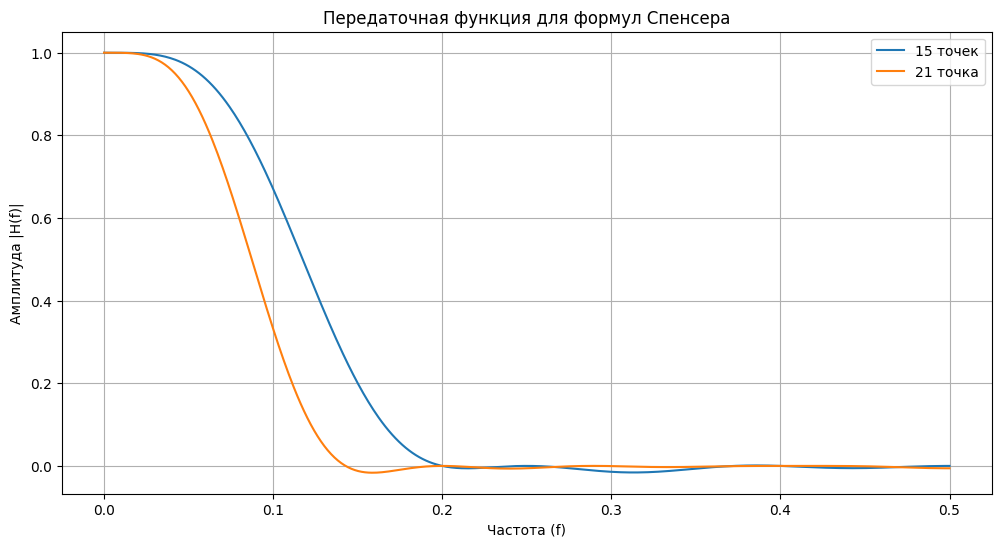

In [17]:
def H_spencer15(f):
    w = 2 * np.pi * f
    coeffs = [74, 67, 46, 21, 3, -5, -6, -3]
    cos_sum = np.sum([coeffs[k] * np.cos(w * k) for k in range(1, 8)], axis=0)
    return (coeffs[0] + 2 * cos_sum) / 320

def H_spencer21(f):
    w = 2 * np.pi * f
    coeffs = [60, 57, 47, 33, 18, 6, -2, -5, -5, -3, -1]
    cos_sum = np.sum([coeffs[k] * np.cos(w * k) for k in range(1, 11)], axis=0)
    return (coeffs[0] + 2 * cos_sum) / 350

plt.figure(figsize=(12, 6))
plt.plot(f, H_spencer15(f), label='15 точек')
plt.plot(f, H_spencer21(f), label='21 точка')
plt.title('Передаточная функция для формул Спенсера')
plt.xlabel('Частота (f)')
plt.ylabel('Амплитуда |H(f)|')
plt.legend()
plt.grid(True)
plt.show()


Фильтры Спенсера, как и предыдущие, являются низкочастотными. Их ключевое отличие — очень хорошее подавление боковых лепестков, что видно по отсутствию значительных колебаний в полосе подавления. Это делает их особенно эффективными для удаления шума, так как они не вносят искажений на других частотах. 21-точечный фильтр имеет более узкую полосу пропускания, чем 15-точечный, что обеспечивает лучшее сглаживание.

### Задание 5: Графики в логарифмической шкале (Дб)

Для перевода амплитуды в децибелы (дБ) используется формула:
$$ G_{dB} = 20 \log_{10} |H(f)| $$

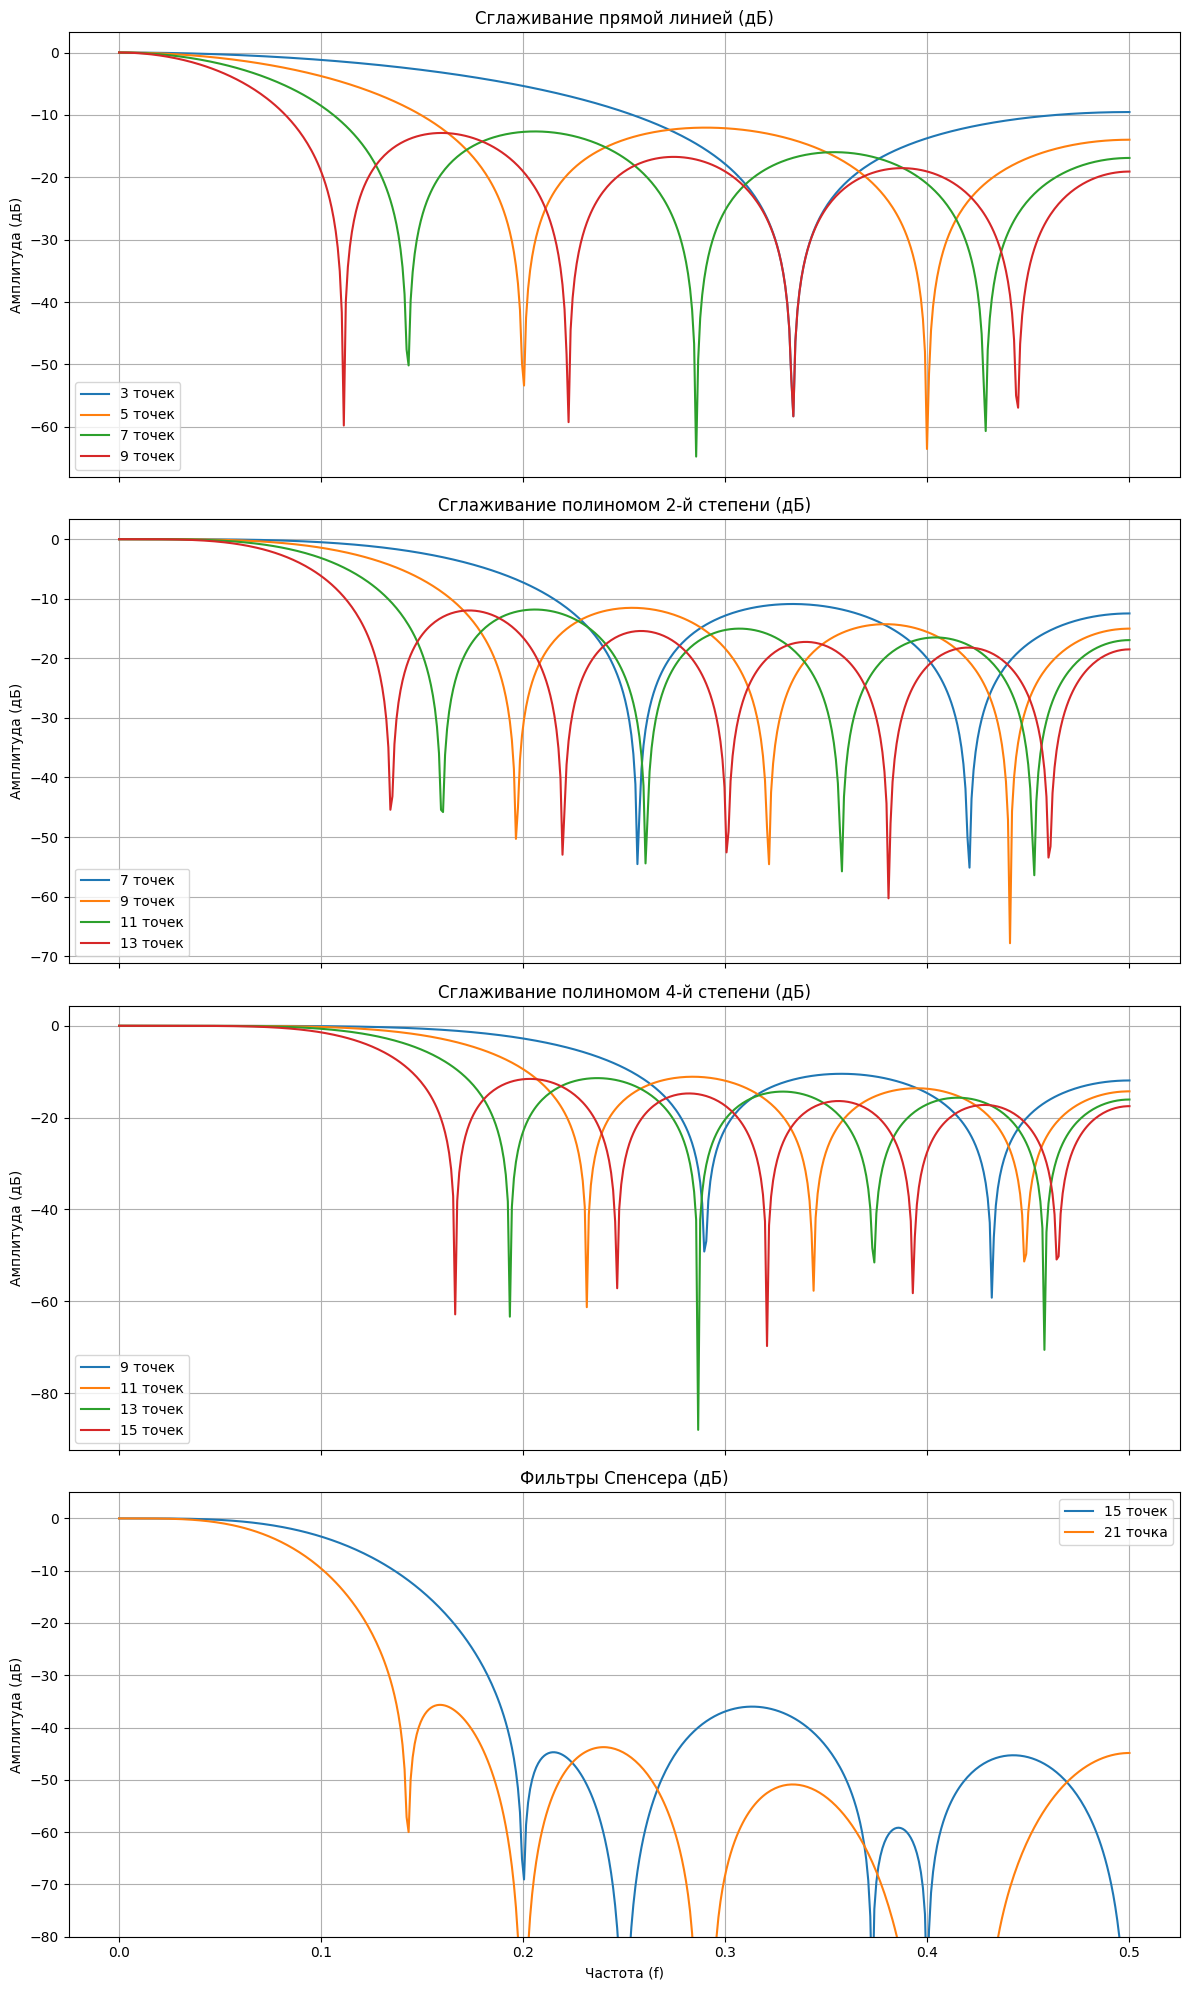

In [18]:
def to_db(H):
    return 20 * np.log10(np.abs(H) + 1e-6) # Добавляем малое число, чтобы избежать log(0)

fig, axs = plt.subplots(4, 1, figsize=(12, 20), sharex=True)

# 1. Сглаживание прямой линией
for p in points:
    h = (p - 1) // 2
    axs[0].plot(f, to_db(H_line(f, h)), label=f'{p} точек')
axs[0].set_title('Сглаживание прямой линией (дБ)')
axs[0].set_ylabel('Амплитуда (дБ)')
axs[0].legend()
axs[0].grid(True)

# 2. Сглаживание полиномом 2-й степени
for p in points2:
    h = (p - 1) // 2
    axs[1].plot(f, to_db(H_poly2(f, h)), label=f'{p} точек')
axs[1].set_title('Сглаживание полиномом 2-й степени (дБ)')
axs[1].set_ylabel('Амплитуда (дБ)')
axs[1].legend()
axs[1].grid(True)

# 3. Сглаживание полиномом 4-й степени
for p in points4:
    h = (p - 1) // 2
    axs[2].plot(f, to_db(H_poly4(f, h)), label=f'{p} точек')
axs[2].set_title('Сглаживание полиномом 4-й степени (дБ)')
axs[2].set_ylabel('Амплитуда (дБ)')
axs[2].legend()
axs[2].grid(True)

# 4. Фильтры Спенсера
axs[3].plot(f, to_db(H_spencer15(f)), label='15 точек')
axs[3].plot(f, to_db(H_spencer21(f)), label='21 точка')
axs[3].set_title('Фильтры Спенсера (дБ)')
axs[3].set_xlabel('Частота (f)')
axs[3].set_ylabel('Амплитуда (дБ)')
axs[3].legend()
axs[3].grid(True)

plt.ylim(-80, 5)
plt.tight_layout()
plt.show()


Логарифмическая шкала позволяет детально рассмотреть поведение фильтров в полосе подавления (где амплитуда очень мала). На линейных графиках эти малые значения практически неразличимы и сливаются с нулем.

В децибелах хорошо видна глубина подавления боковых лепестков. Например, для линейного сглаживания первый боковой лепесток находится на уровне около -13 дБ, в то время как у фильтров Спенсера боковые лепестки подавлены значительно сильнее (ниже -40 дБ). Это показывает, насколько эффективно фильтр подавляет нежелательные частоты. Логарифмический масштаб является стандартным инструментом для анализа качества фильтров, так как он акцентирует внимание на их способности к подавлению шума.

### Задание 6: Сопоставительный анализ

Все рассмотренные фильтры являются **низкочастотными**, то есть они пропускают низкие частоты и подавляют высокие. Это основное свойство, позволяющее использовать их для сглаживания.

1.  **Линейное сглаживание:** Самый простой фильтр. Обладает самой широкой полосой пропускания и наихудшим подавлением боковых лепестков (около -13 дБ). Это означает, что он слабо подавляет шум и может искажать сигнал.
2.  **Полиномиальное сглаживание 2-й степени:** Показывает лучшие характеристики по сравнению с линейным. Полоса пропускания уже, а подавление боковых лепестков значительно лучше. Это хороший компромисс между простотой и эффективностью.
3.  **Полиномиальное сглаживание 4-й степени:** Имеет более широкую полосу пропускания, чем фильтр 2-й степени. Это позволяет лучше сохранять резкие изменения в сигнале, но ценой худшего подавления высокочастотного шума.
4.  **Фильтры Спенсера:** Демонстрируют наилучшие характеристики. У них очень хорошее подавление в полосе задерживания (ниже -40 дБ) и практически отсутствуют боковые лепестки. Это делает их идеальными для задач, где требуется максимальное удаление шума без внесения искажений.

**Общая тенденция:** Для всех типов фильтров увеличение количества точек (ширины окна) приводит к сужению главной полосы пропускания, что улучшает сглаживание, но может привести к потере полезных деталей сигнала.

## Выводы

В ходе данной лабораторной работы был проведен анализ частотных характеристик различных нерекурсивных фильтров, используемых для сглаживания временных рядов. Были выведены и исследованы передаточные функции для линейного сглаживания, полиномиального сглаживания 2-й и 4-й степеней, а также для 15- и 21-точечных фильтров Спенсера.

Анализ показал, что все фильтры являются низкочастотными, но их эффективность в подавлении высокочастотного шума существенно различается. Фильтры Спенсера продемонстрировали наилучшие результаты благодаря глубокому подавлению боковых лепестков, что делает их наиболее подходящими для качественного сглаживания. Полиномиальные фильтры представляют собой компромисс между качеством сглаживания и сохранением деталей сигнала. Использование логарифмической шкалы (дБ) позволило наглядно оценить и сравнить эффективность подавления шума различными фильтрами, что затруднительно сделать на графиках в линейном масштабе.